# Assignment 4 - Lead Compensators

        In this assignment we will design a Lead Compensator to meet given design requirements.
        Consider feedback system as shown in the figure where the plant transfer function
$P(s) = \frac{1}{(s+1)(s+3)(s+5)}$



# 1. Determine the desired location of the closed loop poles such that the closed-loop system has a 2% settling time equal to 2 seconds and a stability margin equal to 1.2.

$M_r = \frac{\alpha^2}{s \alpha \beta}$

$\alpha^2 - 2\alpha \beta M_r + \beta^2 = 0$

Use quadratic formula to solve for $\alpha$ and $\beta$.

$\alpha = \frac{2 \beta M_r \pm \sqrt{(2 \beta M_r)^2 - 4 \beta^2}}{2}$

$\alpha = \beta M_r \pm \beta \sqrt{M_r^2 - 1}$

$\alpha = \beta (M_r \pm \sqrt{M_r^2 -1})$

$\alpha = \beta (1.2 \pm \sqrt{1.2^2 -1})$

$\alpha = \beta (1.2 \pm \frac{\sqrt{11}}{5})$

$\alpha = 1.863324958 \beta$ or $\alpha = 0.536675042 \beta$

Since there is no resonance peak if $\alpha > \beta$ therefore we want $\beta > \alpha \rightarrow$  $\alpha = 0.536675042 \beta$

Now for the settling time we have 

$\tau = \frac{4}{\alpha}$

$\alpha = \frac{4}{\tau}$

$\alpha = \frac{4}{2}$

$\alpha = 2$

And finally we have 

$\beta = \frac{\alpha}{0.536675042}$

$\beta = 3.726649916$

so the desired pole location is $2 \pm 3.726649916 j$

# 2. Make a root locus plot of the uncompensated system. Mark the location of the desired closed-loop poles on the Root Locus.

In [14]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp
import math 
import enel441_utilities as eu
%matplotlib widget

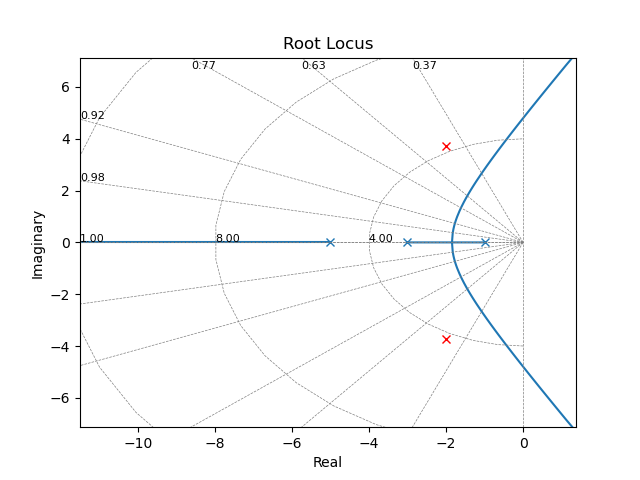

In [15]:
P = ct.tf(1,[1, 9, 23, 15])
desired_cl_poles_alpha = 2
desired_cl_poles_beta = 3.726649916
desired_cl_poles = complex(desired_cl_poles_alpha, desired_cl_poles_beta)
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), "rx")
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), "rx")
plt.show()

# 3. Design two different lead compensators for the system using the Root Locus approach.
i) Calculate the phase at the close loop pole -2 + 3.726649916j. (Remember to add 180 degrees from the closed-loop pole phase  with -$\alpha$)
$$ 
\begin{align}
s &= -2 + 3.726649916j \\
(s+1)&:-2 + 3.726649916j + 1 = -1 + 3.726649916j = 3.858467 \angle{105.05076} \\
(s+3)&: -2 + 3.726649916j + 3 = 1 + 3.726649916j = 3.858467 \angle{74.9792} \\
(s+5)&:  -2 + 3.726649916j + 5 = 3 + 3.726649916j = 4.78413206 \angle{51.165498} \\
P(-2 + 3.726649916j) &= \frac{1}{(3.858467 \angle{105.05076})(3.858467 \angle{74.9792})(4.78413206 \angle{51.165498} )}  \\
&= \frac{1}{3.858467*3.858467*4.78413206} \angle{-105.05076-74.9792-51.165498} \\
&= 0.01588 \angle{-231.195458} \\
\end{align}
$$
     
        We will add 51.195458 degrees of phase to the point $-2+j3.726649916$ by adding a real pole and a real zero. 

# Lead Compensator 1

        For the zero: Get a 65 degree phase by having 

$\arctan{\frac{3.726649916}{x}} = 65 $

x = 1.737765466

Then add 2 because calculated alpha is -2 thus:
$(s + 3.737765466):-2 + 3.726649916j + 3.737765466 =  1.737765466 +3.726649916j \rightarrow 4.111903397\angle{65}$

        Now get a 13.804542 degree phase of the pole by having, where x is the distance from the pole:
$\tan{13.804542} = \frac{\beta}{x}$

$x = \frac{\beta}{\tan{13.804542}} $

$x = 15.16701084 $

Therefore the pole is at: -17.16701084 $\rightarrow 15.61813492\angle{13.804542}$
$$
\begin{align}
L(s) &= K(s) P(s) \\
&= K_{ld}\frac{s + 3.737765466}{s+17.16701084} \frac{1}{(s+1)(s+3)(s+5)}.
\end{align}
$$

Recall the gain condition, that any point $a$ on the Root Locus must satisfy $|L(s)|_{s=a} = 1$.

We can use this formula to solve for $K_{ld}$:

$$
\begin{align}
L(-2 + 3.726649916j) &= |K_{ld}\frac{s+3.737765466}{s+17.16701084} \frac{1}{(s+1)(s+3)(s+5)}|\\
1 &=K_{ld} \frac{4.111903397}{15.61813492}   \frac{1}{3.858467*3.858467*4.78413206} \\
K_{ld} &= 270.53222
\end{align}
$$

$K_{l_1}(s) = 270.53222\frac{s+3.737765466}{s+17.16701084}$

# Lead Compensator 2

        For the zero: Get a 60 degree phase by having 

$\arctan{\frac{3.726649916}{x}} = 60 $

x = 2.15158242

Then add 2 because calculated alpha is -2 thus:
$(s + 4.15158242):-2 + 3.726649916j + 4.15158242 =  2.15158242 +3.726649916j \rightarrow 4.30316484\angle{60}$

        Now get a 8.804542 degree phase of the pole by having, where x is the distance from the pole:
$\tan{8.804542} = \frac{\beta}{x}$

$x = \frac{\beta}{\tan{8.804542}} $

$x = 24.06007903 $

Therefore the pole is at: 26.06007903 $\rightarrow 24.34697771\angle{8.804542}$
$$
\begin{align}
L(s) &= K(s) P(s) \\
&= K_{ld}\frac{s + 4.15158242}{s+26.06007903} \frac{1}{(s+1)(s+3)(s+5)}.
\end{align}
$$

Recall the gain condition, that any point $a$ on the Root Locus must satisfy $|L(s)|_{s=a} = 1$.

We can use this formula to solve for $K_{ld}$:

$$
\begin{align}
L(-2 + 3.726649916j) &= |K_{ld}\frac{s+4.15158242}{s+26.06007903} \frac{1}{(s+1)(s+3)(s+5)}|\\
1 &=K_{ld} \frac{4.30316484}{24.34697771}   \frac{1}{3.858467*3.858467*4.78413206} \\
K_{ld} &= 402.98586
\end{align}
$$
$K_{l_2}(s) = 270.53222\frac{s+4.15158242}{s+26.06007903}$


# Lead Compensator 3 (For fun)

        For the zero: Get a 72 degree phase by having 

$\arctan{\frac{3.726649916}{x}} = 72 $

x = 1.210862008

Then add 2 because calculated alpha is -2 thus:
$(s + 3.210862008):-2 + 3.726649916j + 3.210862008 =  1.210862008 +3.726649916j \rightarrow 3.91843177\angle{72}$

        Now get a 20.804542 degree phase of the pole by having, where x is the distance from the pole:
$\tan{20.804542} = \frac{\beta}{x}$

$x = \frac{\beta}{\tan{20.804542}} $

$x = 9.808133291 $

Therefore the pole is at: 11.808133291  $\rightarrow 10.49225426\angle{20.804542}$
$$
\begin{align}
L(s) &= K(s) P(s) \\
&= K_{ld}\frac{s + 3.210862008}{s+11.808133291} \frac{1}{(s+1)(s+3)(s+5)}.
\end{align}
$$

Recall the gain condition, that any point $a$ on the Root Locus must satisfy $|L(s)|_{s=a} = 1$.

We can use this formula to solve for $K_{ld}$:

$$
\begin{align}
L(-2 + 3.726649916j) &= |K_{ld}\frac{s+3.210862008}{s+11.808133291} \frac{1}{(s+1)(s+3)(s+5)}|\\
1 &=K_{ld} \frac{3.91843177}{10.49225426}   \frac{1}{3.858467*3.858467*4.78413206} \\
K_{ld} &= 190.71693
\end{align}
$$
$K_{l_2}(s) = 190.71693\frac{s+3.210862008}{s+11.808133291} $



# 4. Make a Root Locus plot for each of the two compensated systems.

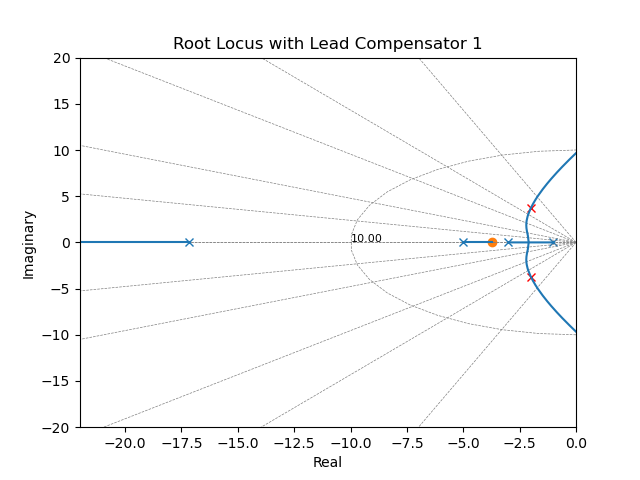

In [16]:
Kl= 270.53222
K1 = ct.tf([Kl, Kl*3.737765466], [1, 17.16701084]) 
L1 = P*K1
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(L1)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), "rx")
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), "rx")
ax.set_xlim(-22,0)
ax.set_ylim(-20,20)
ax.set_title("Root Locus with Lead Compensator 1")
plt.show()


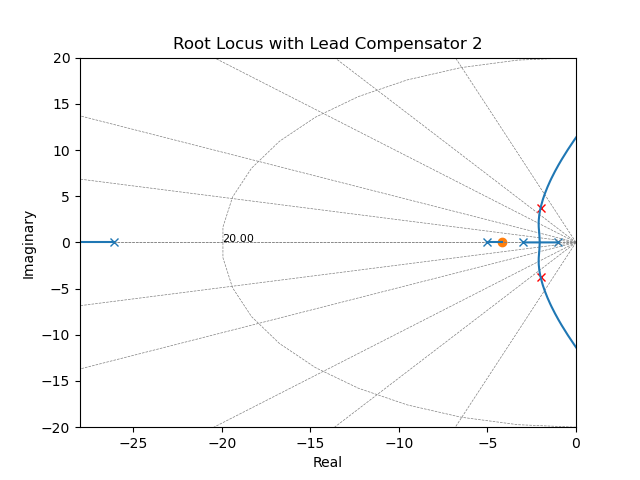

In [17]:
Kl= 402.98586
K2 = ct.tf([Kl, Kl*4.15158242], [1, 26.06007903]) 
L1 = P*K2
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(L1)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), "rx")
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), "rx")
ax.set_xlim(-28,0)
ax.set_ylim(-20,20)
ax.set_title("Root Locus with Lead Compensator 2")
plt.show()



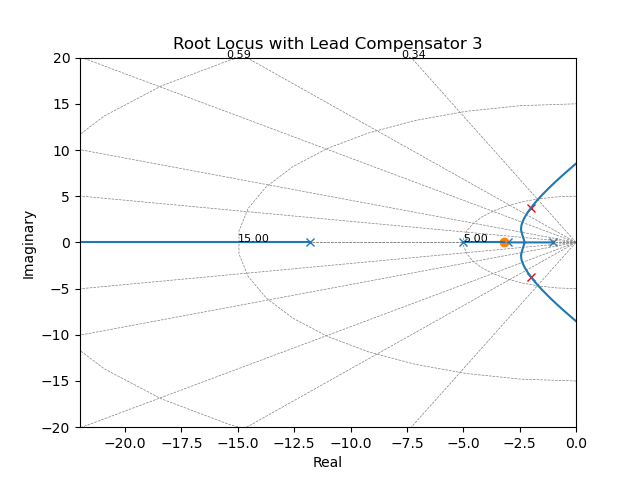

In [18]:
Kl= 190.71693
K3 = ct.tf([Kl, Kl*3.210862008], [1, 11.808133291]) 
L1 = P*K3
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(L1)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), "rx")
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), "rx")
ax.set_xlim(-22,0)
ax.set_ylim(-20,20)
ax.set_title("Root Locus with Lead Compensator 3")
plt.show()


# 5. Make of plot of the ’Gang of Four’ transfer functions. Determine the advantages/disadvantages of both your designs. Did you meet the robustness design requirement?

        Yes, the designs meet the robustness design requirements since the stability margin of the compensated systems are equal to 1.2,  
        this is because we increase alpha which decreases the magnitude of the resonace peak, 
        thus giving a robust system with a stability margin of 1.2

        K1 Advantages:
        Better noise rejection than K2, since the magnitude of K1 at higher frequencies is lower than K2
        K1 requires a lower magintude of input to the plant than Ks
        K1 Disadvantages:
        Reference tracking and disturbance rejection not as good as K2, since the magnitude is higher
        K1 is less robust than K2, since the magintude of the resonace peak is higher

        K2 Advantages:
        Reference tracking and disturbance rejection is better than K1, since the magnitude is lower
        K2 is more robust than K1, since the magintude of the resonace peak is lower
        K2 Disadvantages:
        K2 requires a higher magintude of input to the plant than K1
        K2 has a higher noise rejection than K1, since the magnitude of K2 at higher frequencies is higher than K1


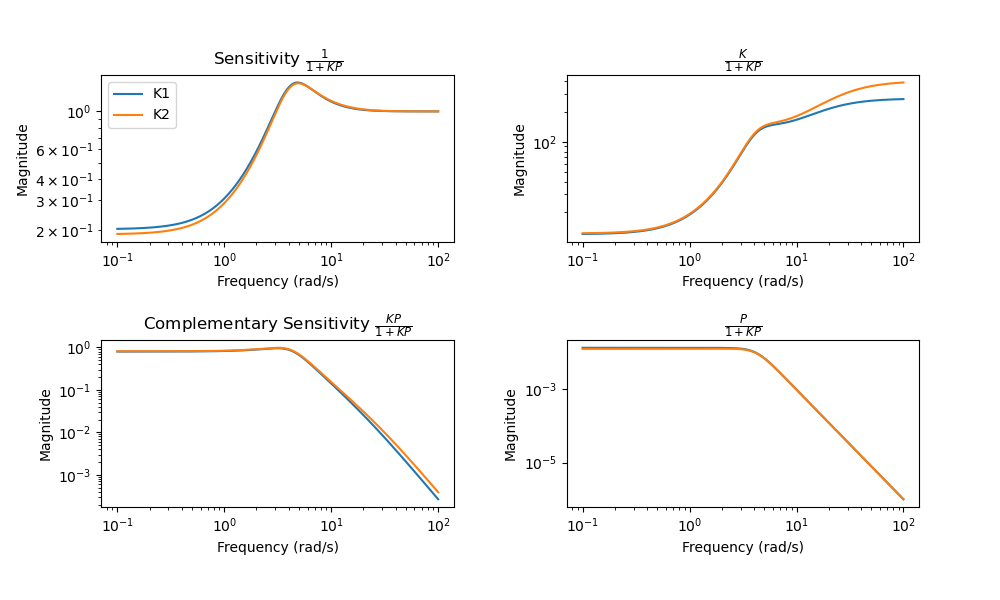

In [19]:
T1 = P*K1/(1+P*K1)
T2 = P*K2/(1+P*K2)
# T3 = P*K3/(1+P*K3)
S1 = 1/(1+P*K1)
S2 = 1/(1+P*K2)
# # S3 = 1/(1+P*K3)
SK1 = K1*S1
SK2 = K2*S2
# # # SK3 = K3*S3
SP1 = P*S1
SP2 = P*S2
# # SP3 = P*S3
mag_S, phase_S, w_S = ct.bode_plot([S1,S2],plot=False)
mag_T, phase_T, w_T = ct.bode_plot([T1,T2],plot=False)
mag_SK, phase_SK, w_SK = ct.bode_plot([SK1,SK2],plot=False)
mag_SP, phase_SP, w_SP = ct.bode_plot([SP1,SP2],plot=False)
fig, ax = plt.subplots(2,2, figsize=(10,6))
fig.tight_layout(pad=5.0)
ax[0,0].loglog(w_S[0],mag_S[0], label="K1")
ax[0,0].loglog(w_S[1],mag_S[1], label="K2")
# ax[0,0].loglog(w_S[2],mag_S[2], label="K3")
ax[0,0].set_title(r"Sensitivity $\frac{1}{1+KP}$")
ax[0,0].legend()
ax[0,0].set_xlabel("Frequency (rad/s)")
ax[0,0].set_ylabel("Magnitude")
ax[1,0].loglog(w_T[0],mag_T[0])
ax[1,0].loglog(w_T[1],mag_T[1])
# # ax[1,0].loglog(w_T[2],mag_T[2])
ax[1,0].set_title(r"Complementary Sensitivity $\frac{KP}{1+KP}$")
ax[1,0].set_xlabel("Frequency (rad/s)")
ax[1,0].set_ylabel("Magnitude")
ax[0,1].loglog(w_SK[0],mag_SK[0])
ax[0,1].loglog(w_SK[1],mag_SK[1])
# # ax[0,1].loglog(w_SK[2],mag_SK[2])
ax[0,1].set_title(r"$\frac{K}{1+KP}$")
ax[0,1].set_xlabel("Frequency (rad/s)")
ax[0,1].set_ylabel("Magnitude")
ax[1,1].loglog(w_SP[0],mag_SP[0])
ax[1,1].loglog(w_SP[1],mag_SP[1])
# # ax[1,1].loglog(w_SP[2],mag_SP[2])
ax[1,1].set_title(r"$\frac{P}{1+KP}$")
ax[1,1].set_xlabel("Frequency (rad/s)")
ax[1,1].set_ylabel("Magnitude")
plt.show()


# 6. Make a plot of the step response of the closed-loop system for each of your design. Did you meet the settling time design requirement?

        Yes. the settling time requirement has been met, this can be seen in the step response plots below as well as the printed step information

T1:
{'RiseTime': 0.3852313323885949, 'SettlingTime': 2.009245772850319, 'SettlingMin': 0.7235515033649377, 'SettlingMax': 0.9469080509321718, 'Overshoot': 18.804441376662318, 'Undershoot': 0, 'Peak': 0.9469080509321718, 'PeakTime': 0.8913195533696903, 'SteadyStateValue': 0.7970308516750286}
T2:
{'RiseTime': 0.37151282920526424, 'SettlingTime': 1.9917215565726665, 'SettlingMin': 0.7306684455798588, 'SettlingMax': 0.9648485399509905, 'Overshoot': 19.028422299493943, 'Undershoot': 0, 'Peak': 0.9648485399509905, 'PeakTime': 0.8720231685512452, 'SteadyStateValue': 0.8106034855467396}


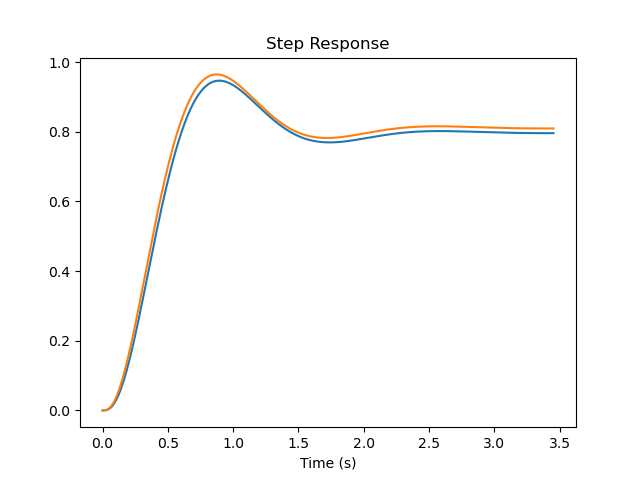

In [20]:
t1,y1 = ct.step_response(T1)
t2,y2 = ct.step_response(T2)
# t3,y3 = ct.step_response(T3)
# ct.step_info(T1)
print("T1:")
print(ct.step_info(T1))
print("T2:")
print(ct.step_info(T2))
# print(ct.step_info(T3))
fig,ax = plt.subplots(1)
ax.plot(t1,y1)
ax.plot(t2,y2)
# ax.plot(t3,y3)
ax.set_title("Step Response")
ax.set_xlabel("Time (s)")
plt.show()